<a href="https://colab.research.google.com/github/YugPatel07/Machine-Learning/blob/main/Airlines_YUGP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [ ]:
data = pd.read_csv('/content/Airlines.csv')
data.head()

,Unnamed: 0.1,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
data.shape

(10000, 26)

In [ ]:
data.isnull().sum()

Unnamed: 0.1                          0
Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             26


In [ ]:
data.drop(['Unnamed: 0.1',	'Unnamed: 0',	'id'], axis=1, inplace= True)

In [ ]:
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age',
       'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [ ]:
data.columns=[each.replace(" ","_") for each in data.columns]

In [ ]:
data.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

**SINGLE COLUMN TRANSFORMATION, from category to numeric**

In [ ]:
data["satisfaction"]=[1 if each=="satisfied" else 0 for each in data.satisfaction]
data["satisfaction"].value_counts()

0    5689
1    4311
Name: satisfaction, dtype: int64

In [ ]:
# Gender vs satisfaction
data[["Gender","satisfaction"]].groupby(["Gender"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Gender,satisfaction
1,Male,0.438062
0,Female,0.424432


In [ ]:
# Age vs satisfaction
data[["Age","satisfaction"]].groupby(["Age"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Age,satisfaction
71,79,0.666667
39,46,0.643192
34,41,0.632743
38,45,0.608466
66,73,0.600000
...,...,...
7,14,0.076923
0,7,0.071429
59,66,0.050000
69,76,0.000000


<Axes: >

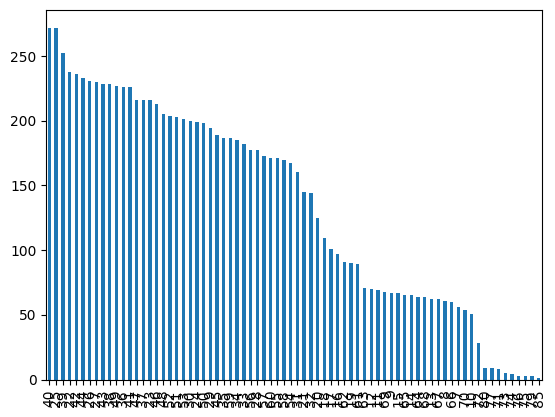

In [ ]:
data["Age"].value_counts().plot(kind='bar')

fill null values

In [ ]:
data['Arrival_Delay_in_Minutes'] = data['Arrival_Delay_in_Minutes'].fillna(data.Arrival_Delay_in_Minutes.mean())

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  object 
 1   Customer_Type                      10000 non-null  object 
 2   Age                                10000 non-null  int64  
 3   Type_of_Travel                     10000 non-null  object 
 4   Class                              10000 non-null  object 
 5   Flight_Distance                    10000 non-null  int64  
 6   Inflight_wifi_service              10000 non-null  int64  
 7   Departure/Arrival_time_convenient  10000 non-null  int64  
 8   Ease_of_Online_booking             10000 non-null  int64  
 9   Gate_location                      10000 non-null  int64  
 10  Food_and_drink                     10000 non-null  int64  
 11  Online_boarding                    10000 non-null  int6

In [ ]:
data.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


Encoding Categorical Columns

In [ ]:
cat_column = data.select_dtypes(include=['object']).columns
print(cat_column)

Index(['Gender', 'Customer_Type', 'Type_of_Travel', 'Class'], dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [ ]:
data['Gender'] = enc.fit_transform(data['Gender'])
data['Customer_Type'] = enc.fit_transform(data['Customer_Type'])
data['Type_of_Travel'] = enc.fit_transform(data['Type_of_Travel'])
data['Class'] = enc.fit_transform(data['Class'])

In [ ]:
data.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [ ]:
x = data.drop('satisfaction',axis=1)
y = data['satisfaction']

Scale the Data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scal = scaler.fit_transform(x)

In [ ]:
print(x_scal)

[[ 1.0218384  -0.46772753 -1.740155   ...  1.31096611  0.26728876
   0.07115659]
 [ 1.0218384   2.13799688 -0.94627961 ... -1.71701889 -0.36072705
  -0.23845878]
 [-0.97862832 -0.46772753 -0.88012333 ...  1.31096611 -0.38689438
  -0.39326646]
 ...
 [-0.97862832 -0.46772753 -0.02009166 ... -0.96002264 -0.38689438
  -0.39326646]
 [ 1.0218384  -0.46772753  0.83994    ...  1.31096611 -0.36072705
  -0.10945237]
 [-0.97862832 -0.46772753  0.1122209  ...  0.55396986 -0.38689438
  -0.39326646]]


TRAIN-TEST Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scal, y, test_size=0.2, random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(8000, 22)
(2000, 22)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
pred = DTC.predict(x_test)

In [ ]:
print('Actual:-',[y_test])
print('Predicted:-',[pred])

Actual:- [9394    0
898     0
2398    0
5906    0
2343    0
       ..
1037    0
2899    1
9549    0
2740    1
6690    0
Name: satisfaction, Length: 2000, dtype: int64]
Predicted:- [array([0, 0, 0, ..., 0, 1, 0])]


### Performance and Evaluation

In [ ]:
from sklearn.metrics import accuracy_score ,confusion_matrix, r2_score

In [ ]:
print('Accuracy Score:- ',accuracy_score(y_test, pred))
print('R2 Score:- ',r2_score(y_test, pred))
print('Confusion Matrix:- \n',confusion_matrix(y_test, pred))

Accuracy Score:-  0.9235
R2 Score:-  0.6855423469639422
Confusion Matrix:- 
 [[1089   75]
 [  78  758]]


Cross Validation Score

In [ ]:
from sklearn.model_selection import cross_val_score
param = cross_val_score(estimator= DTC, X= x_train, y= y_train, cv= 10)
print('Accuracies:- {:.2f} %'.format(param.mean()*100))
print('Standard Deviation:- {:.2f} %'.format(param.std()*100))

Accuracies:- 92.59 %
Standard Deviation:- 0.91 %


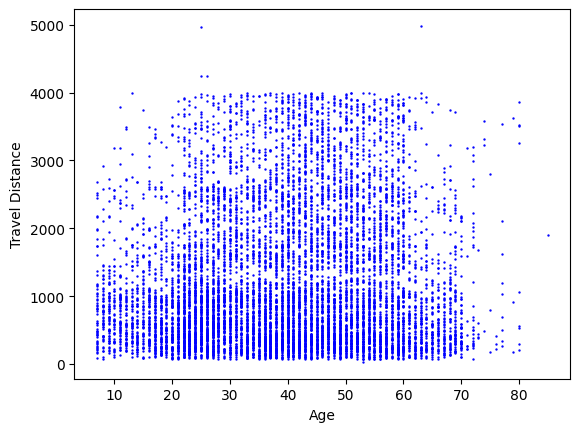

In [ ]:
plt.scatter(x['Age'], x['Flight_Distance'], s=0.5, c='blue')
plt.xlabel('Age')
plt.ylabel('Travel Distance')
plt.show()